In [26]:
import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
train=ds['train']
test=ds['test']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()
test=test.to_pandas()

Filter:   0%|          | 0/6442 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6442 [00:00<?, ? examples/s]

---

## Training Distribution

## Angle Degrees

In [3]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.9224326076008726
Mean: 24.358718314319734
Max: 89.98805846135882
STD: 34.120410293675114


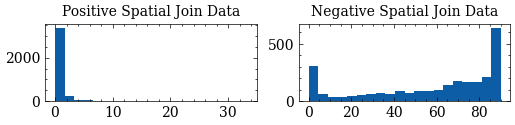

In [4]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel("")
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel("")
#plt.savefig(f"../../misc/join_task_min_angle_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

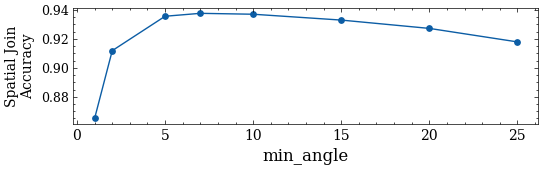

In [5]:
metrics=[1,2,5,7,10,15,20,25]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.yticks(fontsize=9)
plt.ylabel('Spatial Join\nAccuracy', fontsize=10)
plt.xlabel('min_angle', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_angle_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

---

## Euclidean Distance

In [7]:
name='min_euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.884390860713215
Mean: 5.5110303100771985
Max: 9.997677095262258
STD: 3.606794913883234


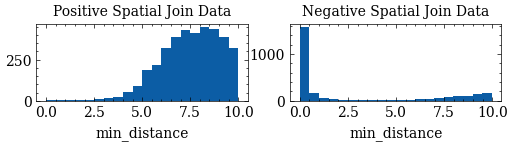

In [8]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
#plt.savefig(f"../../misc/join_task_min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

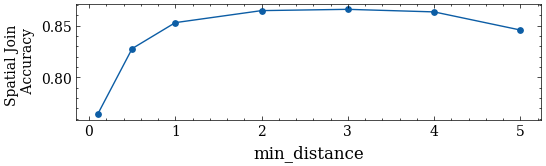

In [12]:
metrics=[0.1,0.5,1,2,3,4,5]
accuracy=[]
for m in metrics:
    pred=np.array(train['min_euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('min_distance', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

## Max_Area

In [13]:
name='max_area'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.013775047447748759
Median: 0.5029537112114839
Mean: 0.4717375348386345
Max: 1.0000000000000002
STD: 0.17118337426491753


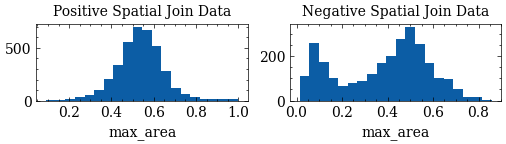

In [14]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('max_area')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('max_area')
#plt.savefig(f"../../misc/join_task_min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

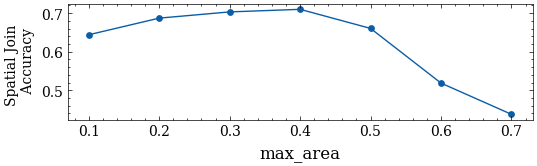

In [15]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('max_area', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

## Min_Area

In [16]:
name='min_area'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.006453694869086496
Median: 0.18375954148627555
Mean: 0.22037841723613075
Max: 0.7406042332178483
STD: 0.1501896887335338


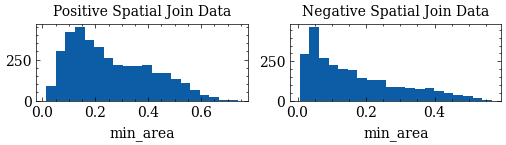

In [17]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('min_area')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('min_area')
#plt.savefig(f"../../misc/join_task_min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

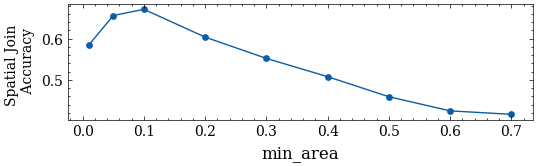

In [19]:
metrics=[0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['min_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('min_area', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

## Comb

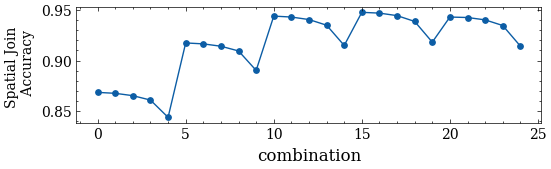

In [20]:
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
train_gt=np.array(train['label'])
combs=list(product(angles, distances))
accuracy=[]
for a,d in combs:
    pred=(np.array(train['min_euc_dist'])>=d)&(np.array(train['min_angle'])<=a)
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('combination', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass

## All

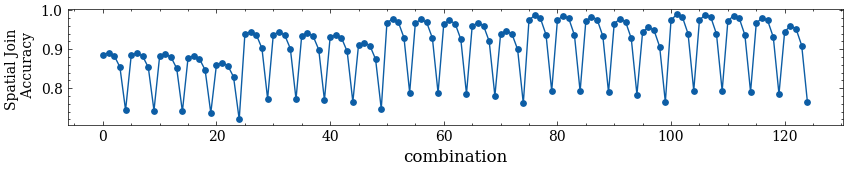

In [23]:
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
max_area=[.1,.2,.3,.4,.5]
train_gt=np.array(train['label'])
combs=list(product(angles, distances, max_area))
accuracy=[]
for a,d,m in combs:
    pred=(np.array(train['min_euc_dist'])>=d)&(np.array(train['min_angle'])<=a)&(np.array(train['max_area'])>=m)
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(10,1.5))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('combination', fontsize=12)
#plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass

---

## Test Inference

In [24]:
def metric_calculation(pred, gt):    
    acc=accuracy_score(gt, pred)
    f1=f1_score(gt, pred, average='macro')
    confusion=confusion_matrix(gt, pred)
    fpr=confusion[0,1]/len(gt) ## predict to be 1; actual 0
    fnr=confusion[1,0]/len(gt) ## predict to be 0; actual 1
    return acc, f1, fpr, fnr

In [27]:
## angle
gt=np.array(test['label'])
for i in [1,2,5,10,20]:
    pred=np.array(test['min_angle'])<=i
    metrics=metric_calculation(pred, gt)
    print(i, metrics[0], metrics[1])

1 0.867 0.8649569334461061
2 0.908 0.9047760996290408
5 0.946 0.9429281655844156
10 0.948 0.9445921985815603
20 0.934 0.9288927961938254


In [28]:
## distance
for i in [1,2,3,4,5]:
    pred=np.array(test['min_euc_dist'])>=i
    metrics=metric_calculation(pred, gt)
    print(i, metrics[0], metrics[1])

1 0.838 0.8138786764705882
2 0.847 0.8255016258002119
3 0.851 0.8311329618258494
4 0.852 0.8326549072817729
5 0.835 0.8173321864008795


In [52]:
## area
for i in [0.1,0.2,0.3,0.4,0.5]:
    pred=np.array(test['max_area'])>=i
    metrics=metric_calculation(pred, gt)
    print(i, metrics[0], metrics[1])

0.1 0.655 0.5076991570953394
0.2 0.701 0.6018636509502675
0.3 0.735 0.6673357611546085
0.4 0.753 0.7164566494359554
0.5 0.654 0.6494441765180283


In [33]:
## combination (angle, dist)
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
test_gt=np.array(test['label'])
combs=list(product(angles, distances))
accuracy=[]
for a,d in combs:
    pred=(np.array(test['min_euc_dist'])>=d)&(np.array(test['min_angle'])<=a)
    accuracy.append([a,d,accuracy_score(test_gt, pred)])
accuracy_comb1=pd.DataFrame(accuracy,columns=['angle','distance','acc'])
accuracy_comb1.head()

,angle,distance,acc
0,1,1,0.868
1,1,2,0.868
2,1,3,0.866
3,1,4,0.865
4,1,5,0.847


In [37]:
## combination (angle, area)
angles=[1,2,5,10,20]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(angles, max_area))
accuracy=[]
for a,m in combs:
    pred=(np.array(test['max_area'])>=m)&(np.array(test['min_angle'])<=a)
    accuracy.append([a,m,accuracy_score(test_gt, pred)])
accuracy_comb2=pd.DataFrame(accuracy,columns=['angle','area','acc'])
accuracy_comb2.head()

,angle,area,acc
0,1,0.1,0.883
1,1,0.2,0.889
2,1,0.3,0.888
3,1,0.4,0.864
4,1,0.5,0.735


In [68]:
## combination (dist, area)
distances=[1,2,3,4,5]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(distances, max_area))
accuracy=[]
for d,m in combs:
    pred=(np.array(test['max_area'])>=m)&(np.array(test['min_euc_dist'])>=d)
    accuracy.append([d,m,accuracy_score(test_gt, pred)])
accuracy_comb3=pd.DataFrame(accuracy,columns=['distance','area','acc'])
accuracy_comb3.head()

,distance,area,acc
0,1,0.1,0.890
1,1,0.2,0.930
2,1,0.3,0.958
3,1,0.4,0.938
4,1,0.5,0.775


In [34]:
## all
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(angles, distances, max_area))
accuracy=[]
for a,d,m in combs:
    pred=(np.array(test['min_euc_dist'])>=d)&(np.array(test['min_angle'])<=a)&(np.array(test['max_area'])>=m)
    accuracy.append([a,d,m,accuracy_score(test_gt, pred)])
accuracy_all=pd.DataFrame(accuracy,columns=['angle','distance','area','acc'])
accuracy_all.head()

,angle,distance,area,acc
0,1,1,0.1,0.884
1,1,1,0.2,0.888
2,1,1,0.3,0.887
3,1,1,0.4,0.862
4,1,1,0.5,0.733
